In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.shape

(200000, 9)

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
def haversine(lon_1,lon_2,lat_1,lat_2):
    lon_1,lon_2,lat_1,lat_2=map(np.radians,[lon_1,lon_2,lat_1,lat_2])   #conversion of degrees to radians
    diff_lon=lon_2 - lon_1
    diff_lat=lat_2 - lat_1
    km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))
    return km

In [9]:
#distance travelled per ride 
df['Distance']=haversine(df['pickup_longitude'],
                         df['dropoff_longitude'],
                         df['pickup_latitude'],
                         df['dropoff_latitude'])

In [10]:
#rounding upto two decimal places 
df['Distance']=df['Distance'].astype(float).round(2)
print(df.head())

   Unnamed: 0      key  fare_amount          pickup_datetime  \
0    24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC   
1    27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC   
2    44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC   
3    25894730  22:21.0          5.3  2009-06-26 08:22:21 UTC   
4    17610152  47:00.0         16.0  2014-08-28 17:47:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  Distance  
0                1      1.68  
1                1      2.46  
2                1      5.04  
3                3      1.66

Text(0, 0.5, 'Fare Amount')

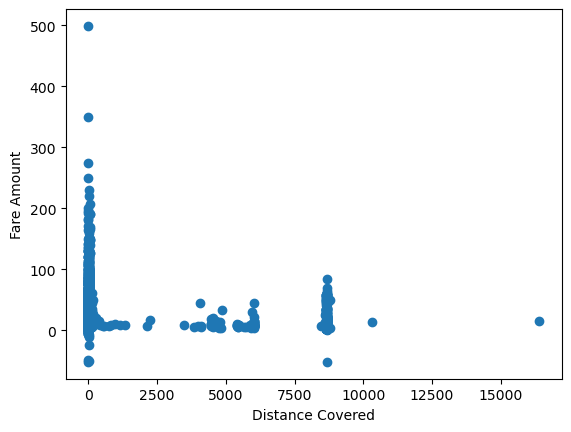

In [11]:
#To check whether there is linear relation or not 
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance Covered")
plt.ylabel("Fare Amount")

In [12]:
#removing outliers(trips with larger distace or no distance)
df.drop(df[df['Distance']>60].index,inplace=True)
df.drop(df[df['Distance']== 0].index,inplace=True)
df.drop(df[df['fare_amount']== 0].index,inplace=True)
df.drop(df[df['fare_amount']<0].index,inplace=True)
df.shape

(193490, 10)

In [13]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index,inplace=True)
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index,inplace=True)
df.shape

(193481, 10)

Text(0, 0.5, 'Fare Amount')

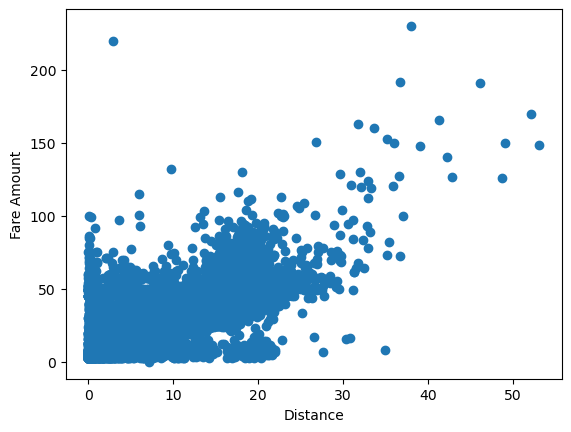

In [14]:
plt.scatter(df["Distance"],df["fare_amount"])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")

In [15]:
df2=pd.DataFrame().assign(fare=df['fare_amount'],Distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   Distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [16]:
df2.shape

(193481, 2)

<Figure size 800x400 with 0 Axes>

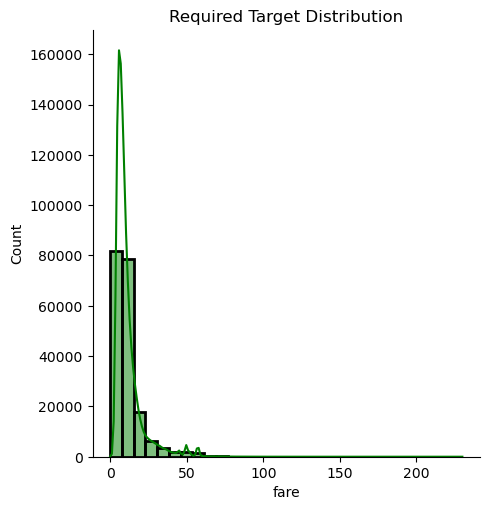

In [17]:
#required fare distribution
plt.figure(figsize=[8, 4])
sns.displot(df2['fare'], color='g', bins=30,
            kde=True,  
            edgecolor="black", linewidth=2)
plt.title('Required Target Distribution')
plt.show()

Text(0, 0.5, 'Fare_Amount')

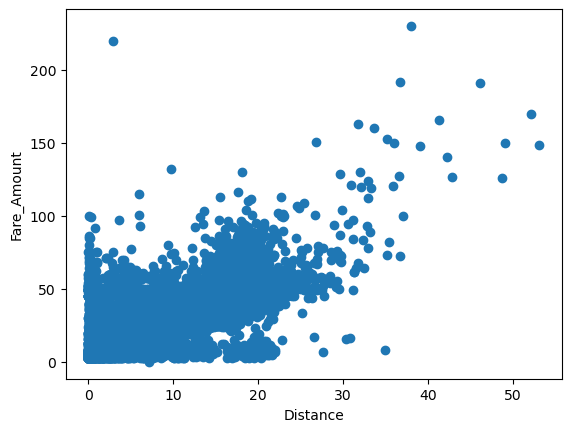

In [19]:
plt.scatter(df2['Distance'],df2['fare'])
plt.xlabel("Distance")
plt.ylabel("Fare_Amount")

In [20]:
x=df2['fare']
y=df2['Distance']

In [21]:
#independent variabale
X=df2['Distance'].values.reshape(-1,1)
#dependent variable 
Y=df2['fare'].values.reshape(-1,1)

In [22]:
#scaling 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
y_std=std.fit_transform(Y)
x_std=std.fit_transform(X)

In [23]:
#spliting in test -train
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x_std,y_std,test_size=0.2,random_state=0)

In [24]:
#model selection -->linear regression 
from sklearn.linear_model import LinearRegression
l_reg= LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
#predicting the test values
y_pred=l_reg.predict(X_test)

In [26]:
#error finding 
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 0.23979019882036237
Mean Squared Error: 0.19845894112525958
Root Mean Squared Error: 0.44548730747941584


Text(0.5, 1.0, 'Fare vs  Distance(Test Set)')

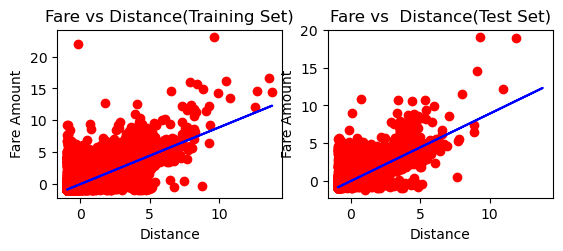

In [27]:
#final plotting 
plt.subplot(2,2,1)
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,l_reg.predict(X_train),color="Blue")
plt.title("Fare vs Distance(Training Set)")
plt.xlabel("Distance")
plt.ylabel("Fare Amount")

plt.subplot(2,2,2)
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,l_reg.predict(X_train),color="blue")
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.title("Fare vs  Distance(Test Set)")